# Electromagnetic Waves

## Theoretical Foundation

Electromagnetic waves are solutions to Maxwell's equations in free space. These waves consist of oscillating electric and magnetic fields that propagate through space at the speed of light.

### Maxwell's Equations in Free Space

In the absence of charges and currents, Maxwell's equations take the form:

$$\nabla \cdot \mathbf{E} = 0$$

$$\nabla \cdot \mathbf{B} = 0$$

$$\nabla \times \mathbf{E} = -\frac{\partial \mathbf{B}}{\partial t}$$

$$\nabla \times \mathbf{B} = \mu_0 \epsilon_0 \frac{\partial \mathbf{E}}{\partial t}$$

### The Wave Equation

Taking the curl of Faraday's law and substituting Ampère's law, we derive the wave equation for the electric field:

$$\nabla^2 \mathbf{E} = \mu_0 \epsilon_0 \frac{\partial^2 \mathbf{E}}{\partial t^2}$$

This reveals the wave propagation speed:

$$c = \frac{1}{\sqrt{\mu_0 \epsilon_0}} \approx 3 \times 10^8 \, \text{m/s}$$

### Plane Wave Solution

For a plane wave propagating in the $z$-direction with electric field polarized in the $x$-direction:

$$E_x(z, t) = E_0 \cos(kz - \omega t + \phi)$$

$$B_y(z, t) = \frac{E_0}{c} \cos(kz - \omega t + \phi)$$

where:
- $E_0$ is the amplitude
- $k = \frac{2\pi}{\lambda}$ is the wave number
- $\omega = 2\pi f$ is the angular frequency
- $\phi$ is the phase constant

The dispersion relation is:

$$\omega = ck$$

### Energy and Poynting Vector

The energy flux is given by the Poynting vector:

$$\mathbf{S} = \frac{1}{\mu_0} \mathbf{E} \times \mathbf{B}$$

The time-averaged intensity is:

$$\langle S \rangle = \frac{1}{2} \epsilon_0 c E_0^2$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Physical constants
c = 3e8  # speed of light (m/s)
epsilon_0 = 8.854e-12  # permittivity of free space (F/m)
mu_0 = 4 * np.pi * 1e-7  # permeability of free space (H/m)

# Wave parameters
wavelength = 500e-9  # 500 nm (visible light)
k = 2 * np.pi / wavelength  # wave number
omega = c * k  # angular frequency
frequency = omega / (2 * np.pi)
E0 = 1.0  # amplitude (V/m)
B0 = E0 / c  # magnetic field amplitude

print(f"Wavelength: {wavelength*1e9:.1f} nm")
print(f"Frequency: {frequency:.3e} Hz")
print(f"Wave number k: {k:.3e} rad/m")
print(f"Angular frequency ω: {omega:.3e} rad/s")
print(f"E₀/B₀ = c: {E0/B0:.3e} m/s")

Wavelength: 500.0 nm
Frequency: 6.000e+14 Hz
Wave number k: 1.257e+07 rad/m
Angular frequency ω: 3.770e+15 rad/s
E₀/B₀ = c: 3.000e+08 m/s


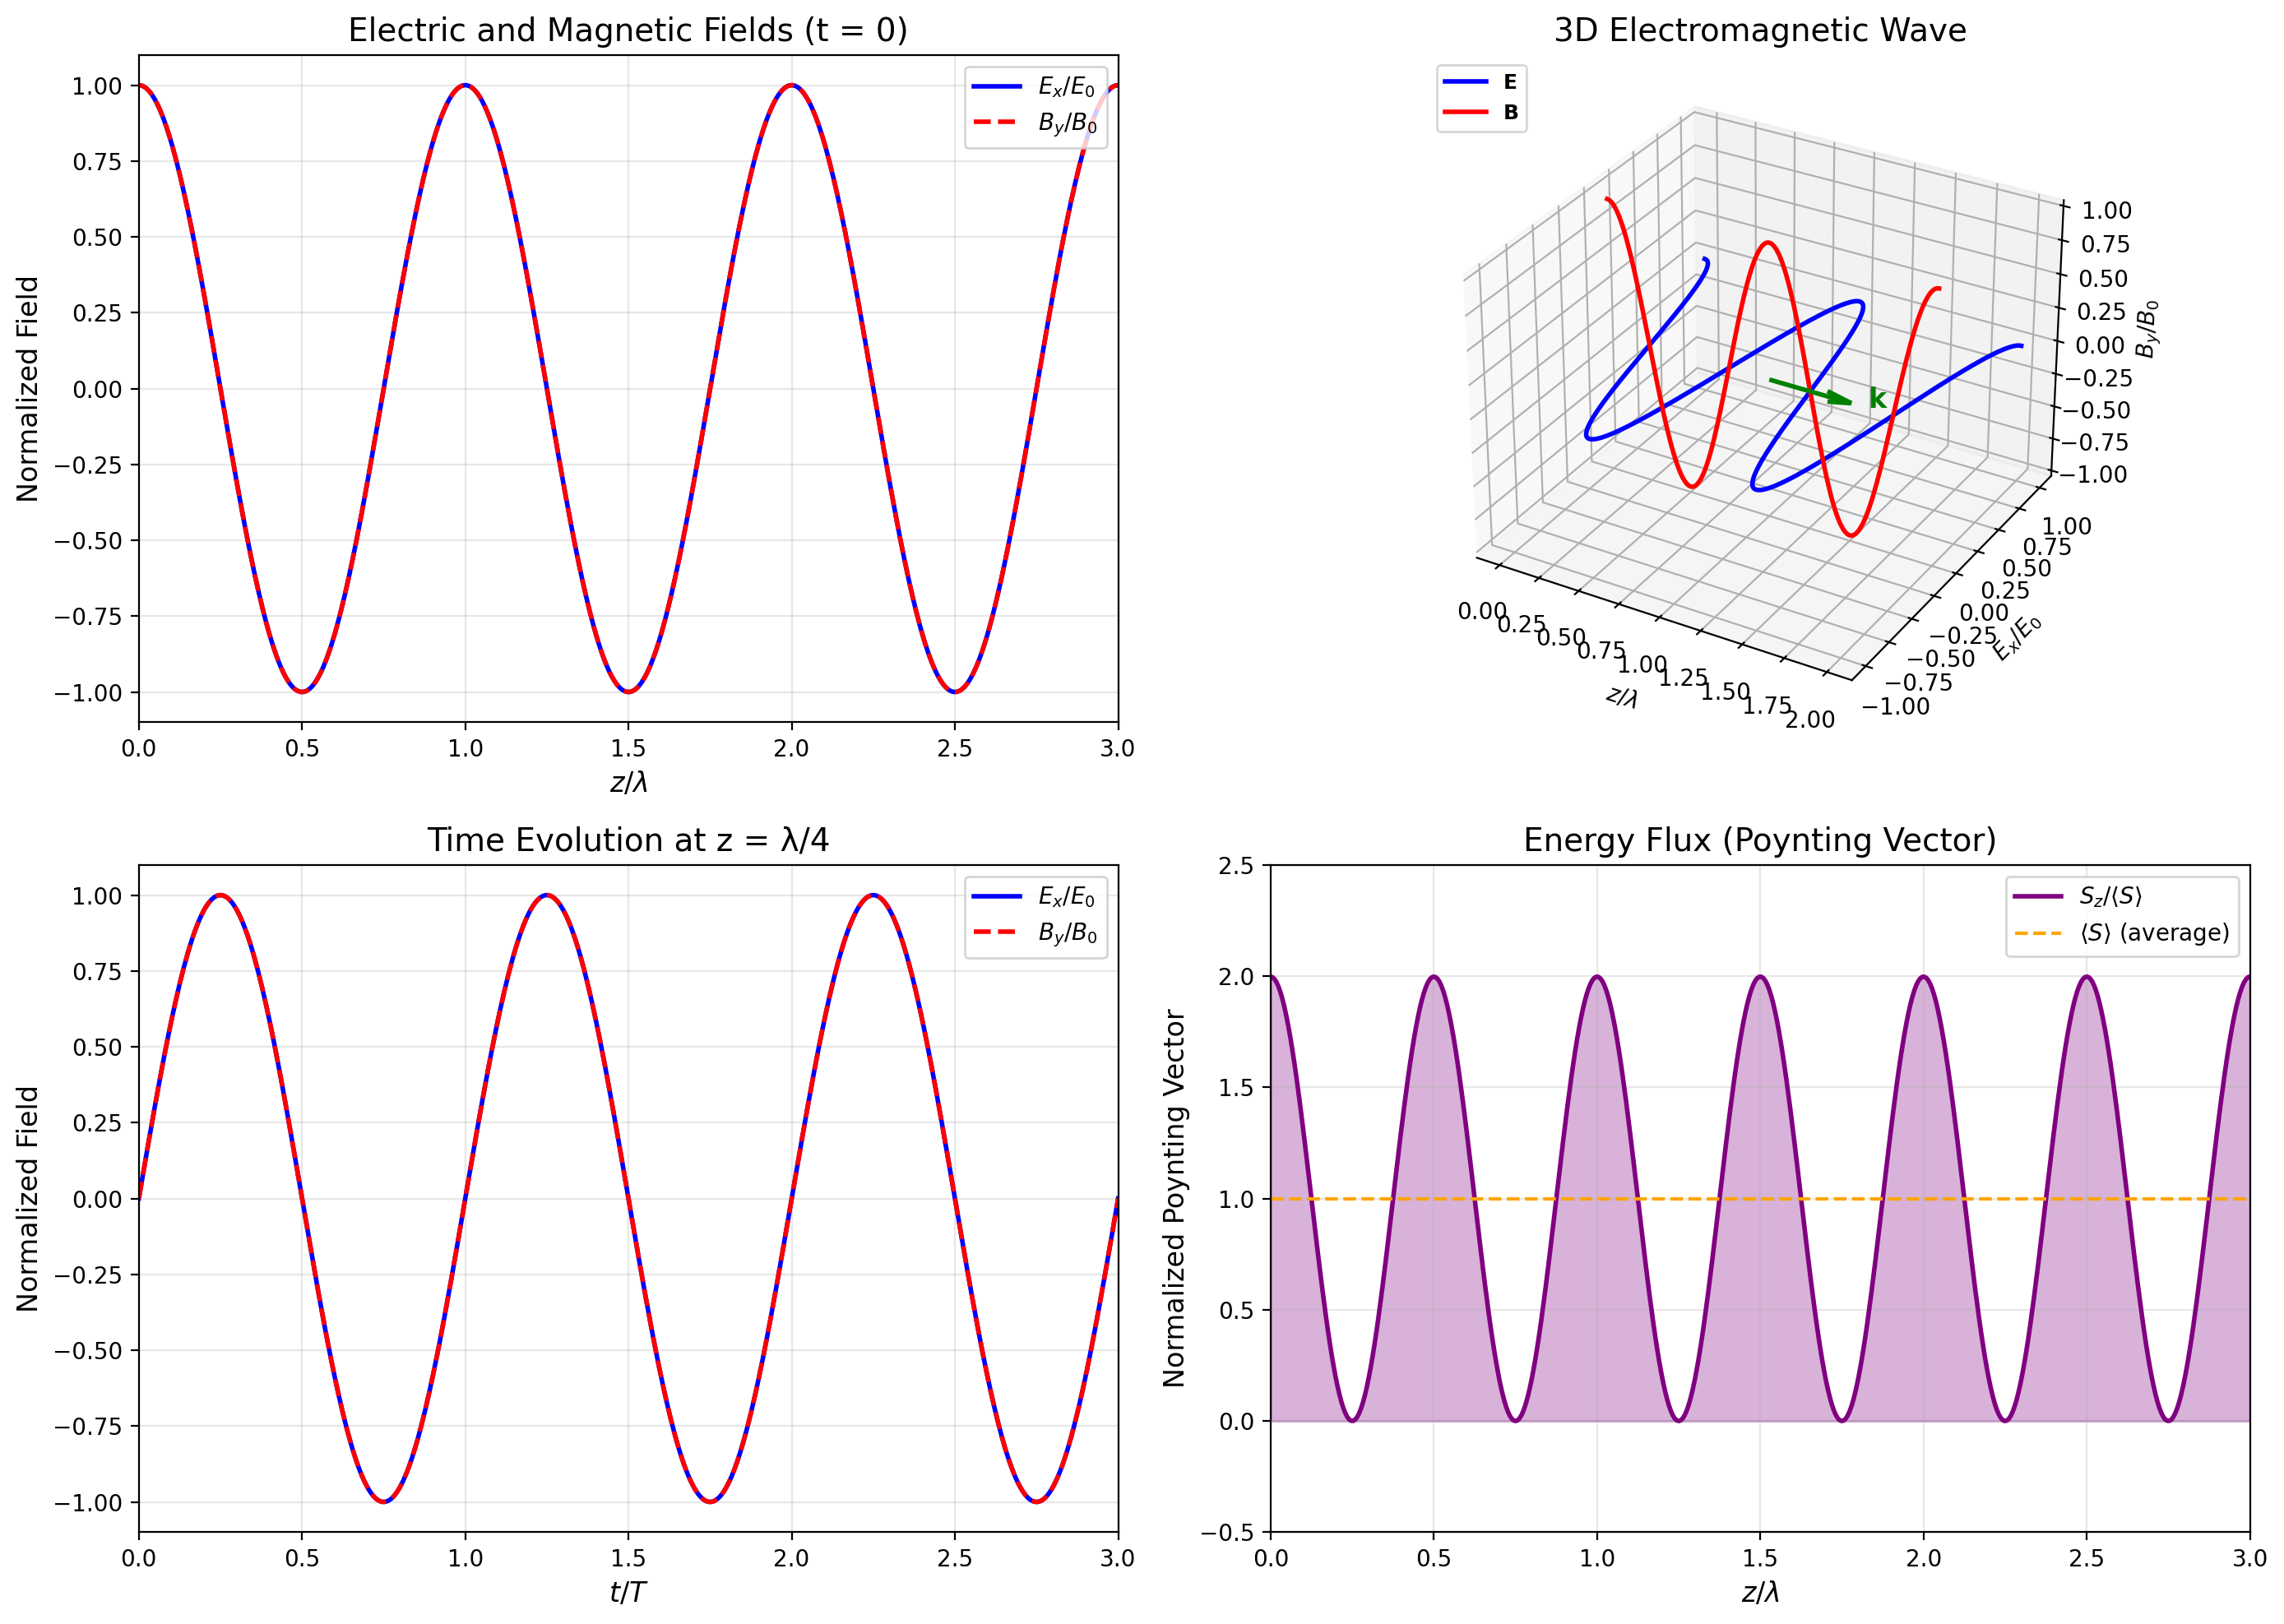


Time-averaged intensity: 1.328e-03 W/m²
Peak Poynting vector: 2.653e-03 W/m²


In [2]:
# Spatial domain (in units of wavelength for visualization)
z = np.linspace(0, 3 * wavelength, 500)
t = 0  # snapshot at t=0

# Electric and magnetic field components
E_x = E0 * np.cos(k * z - omega * t)
B_y = B0 * np.cos(k * z - omega * t)

# Create figure with multiple subplots
fig = plt.figure(figsize=(14, 10))

# Plot 1: E and B fields vs position
ax1 = fig.add_subplot(2, 2, 1)
ax1.plot(z / wavelength, E_x / E0, 'b-', linewidth=2, label=r'$E_x/E_0$')
ax1.plot(z / wavelength, B_y / B0, 'r--', linewidth=2, label=r'$B_y/B_0$')
ax1.set_xlabel(r'$z/\lambda$', fontsize=12)
ax1.set_ylabel('Normalized Field', fontsize=12)
ax1.set_title('Electric and Magnetic Fields (t = 0)', fontsize=14)
ax1.legend(loc='upper right', fontsize=10)
ax1.grid(True, alpha=0.3)
ax1.set_xlim(0, 3)

# Plot 2: 3D representation of EM wave
ax2 = fig.add_subplot(2, 2, 2, projection='3d')
z_3d = np.linspace(0, 2 * wavelength, 200)
E_3d = E0 * np.cos(k * z_3d)
B_3d = B0 * np.cos(k * z_3d)

# E field in x-z plane
ax2.plot(z_3d / wavelength, E_3d / E0, np.zeros_like(z_3d), 'b-', linewidth=2, label=r'$\mathbf{E}$')
# B field in y-z plane (scaled for visibility)
ax2.plot(z_3d / wavelength, np.zeros_like(z_3d), B_3d / B0, 'r-', linewidth=2, label=r'$\mathbf{B}$')
# Propagation direction
ax2.quiver(1, 0, 0, 0.5, 0, 0, color='green', arrow_length_ratio=0.3, linewidth=2)
ax2.text(1.6, 0, 0, r'$\mathbf{k}$', fontsize=12, color='green')

ax2.set_xlabel(r'$z/\lambda$', fontsize=10)
ax2.set_ylabel(r'$E_x/E_0$', fontsize=10)
ax2.set_zlabel(r'$B_y/B_0$', fontsize=10)
ax2.set_title('3D Electromagnetic Wave', fontsize=14)
ax2.legend(loc='upper left', fontsize=9)

# Plot 3: Time evolution at fixed position
ax3 = fig.add_subplot(2, 2, 3)
period = 2 * np.pi / omega
t_arr = np.linspace(0, 3 * period, 500)
z_fixed = wavelength / 4  # fixed position

E_t = E0 * np.cos(k * z_fixed - omega * t_arr)
B_t = B0 * np.cos(k * z_fixed - omega * t_arr)

ax3.plot(t_arr / period, E_t / E0, 'b-', linewidth=2, label=r'$E_x/E_0$')
ax3.plot(t_arr / period, B_t / B0, 'r--', linewidth=2, label=r'$B_y/B_0$')
ax3.set_xlabel(r'$t/T$', fontsize=12)
ax3.set_ylabel('Normalized Field', fontsize=12)
ax3.set_title(f'Time Evolution at z = λ/4', fontsize=14)
ax3.legend(loc='upper right', fontsize=10)
ax3.grid(True, alpha=0.3)
ax3.set_xlim(0, 3)

# Plot 4: Poynting vector (energy flux)
ax4 = fig.add_subplot(2, 2, 4)

# Instantaneous Poynting vector
S_z = (E_x * B_y) / mu_0
S_avg = 0.5 * epsilon_0 * c * E0**2  # time-averaged intensity

ax4.plot(z / wavelength, S_z / S_avg, 'purple', linewidth=2, label=r'$S_z/\langle S \rangle$')
ax4.axhline(y=1, color='orange', linestyle='--', linewidth=1.5, label=r'$\langle S \rangle$ (average)')
ax4.fill_between(z / wavelength, 0, S_z / S_avg, alpha=0.3, color='purple')
ax4.set_xlabel(r'$z/\lambda$', fontsize=12)
ax4.set_ylabel(r'Normalized Poynting Vector', fontsize=12)
ax4.set_title('Energy Flux (Poynting Vector)', fontsize=14)
ax4.legend(loc='upper right', fontsize=10)
ax4.grid(True, alpha=0.3)
ax4.set_xlim(0, 3)
ax4.set_ylim(-0.5, 2.5)

plt.tight_layout()
plt.savefig('electromagnetic_waves_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\nTime-averaged intensity: {S_avg:.3e} W/m²")
print(f"Peak Poynting vector: {S_z.max():.3e} W/m²")

## Analysis and Discussion

### Key Observations

1. **Phase Relationship**: The electric field $\mathbf{E}$ and magnetic field $\mathbf{B}$ oscillate in phase, reaching their maxima and minima simultaneously.

2. **Orthogonality**: $\mathbf{E}$, $\mathbf{B}$, and the propagation direction $\mathbf{k}$ are mutually perpendicular, forming a right-handed coordinate system.

3. **Amplitude Ratio**: The ratio $E_0/B_0 = c$ is a fundamental characteristic of electromagnetic waves in vacuum.

4. **Energy Transport**: The Poynting vector shows that energy flows in the direction of wave propagation. The instantaneous energy flux varies as $\cos^2(kz - \omega t)$, with a time-averaged value of $\langle S \rangle = \frac{1}{2}\epsilon_0 c E_0^2$.

### Electromagnetic Spectrum

The wavelength of 500 nm places this wave in the visible spectrum (green light). The same mathematical description applies across the entire electromagnetic spectrum:

| Type | Wavelength Range | Frequency Range |
|------|-----------------|----------------|
| Radio | > 1 m | < 300 MHz |
| Microwave | 1 mm - 1 m | 300 MHz - 300 GHz |
| Infrared | 700 nm - 1 mm | 300 GHz - 430 THz |
| Visible | 400 - 700 nm | 430 - 750 THz |
| Ultraviolet | 10 - 400 nm | 750 THz - 30 PHz |
| X-rays | 0.01 - 10 nm | 30 PHz - 30 EHz |
| Gamma rays | < 0.01 nm | > 30 EHz |

In [3]:
# Verify the speed of light from vacuum constants
c_calculated = 1 / np.sqrt(mu_0 * epsilon_0)
print(f"Speed of light from μ₀ and ε₀: {c_calculated:.6e} m/s")
print(f"Relative error: {abs(c_calculated - c)/c * 100:.4f}%")

# Energy density
u_E = 0.5 * epsilon_0 * E0**2  # electric field energy density
u_B = 0.5 * B0**2 / mu_0  # magnetic field energy density
print(f"\nElectric field energy density: {u_E:.3e} J/m³")
print(f"Magnetic field energy density: {u_B:.3e} J/m³")
print(f"Ratio u_E/u_B: {u_E/u_B:.6f} (should be 1)")

Speed of light from μ₀ and ε₀: 2.997956e+08 m/s
Relative error: 0.0681%

Electric field energy density: 4.427e-12 J/m³
Magnetic field energy density: 4.421e-12 J/m³
Ratio u_E/u_B: 1.001364 (should be 1)
